<a href="https://colab.research.google.com/github/lmfrossard/BIRCH/blob/master/Introdu%C3%A7%C3%A3o_a_Recomenda%C3%A7%C3%A3o_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["FilmId", "Titulo", "Genero"]
filmes = filmes.set_index("FilmId")
filmes.head()

,Titulo,Genero
FilmId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [38]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "FilmId", "Nota", "Momento"]
notas.head()

,usuarioId,FilmId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [39]:
notas.describe()

,usuarioId,FilmId,Nota,Momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#**Primeira** Tentativa Recomendação Total de Votos

In [40]:
 total_de_votos = notas["FilmId"].value_counts()
 total_de_votos.head()


356     329
318     317
296     307
593     279
2571    278
Name: FilmId, dtype: int64

In [41]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,Titulo,Genero,total_de_votos
FilmId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [42]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,Titulo,Genero,total_de_votos
FilmId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [43]:
notas_medias = notas.groupby("FilmId").mean()["Nota"]
notas_medias.head()

FilmId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

In [44]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


#segunda **heuristica** Nota media e filtrando votos


In [45]:
filmes.sort_values("nota_media", ascending = False).head(10)

,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [46]:
filmes.query("total_de_votos >= 10")

,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
...,...,...,...,...
174055,Dunkirk (2017),Action|Drama|Thriller|War,13.0,3.423077
176371,Blade Runner 2049 (2017),Sci-Fi,18.0,3.805556
177765,Coco (2017),Adventure|Animation|Children,13.0,3.538462


In [47]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [48]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [49]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("Genero=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,Titulo,Genero,total_de_votos,nota_media
FilmId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


#Collaborative Filtering x Content Based **Filtering**

Procurar usuários com similaridades (quem gostou de um dado filme, e quem não gostou de um dado filme
- João deu nota 4 no toystory
- maria deu nota 5 no toystory
- paulo deu nota 3 no toystory

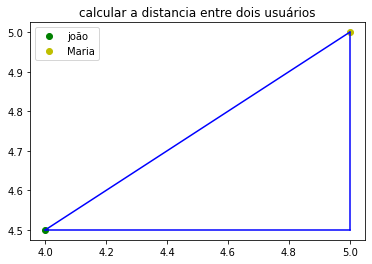

In [11]:
# joao = [4, 4.5]
# maria = [5,5]
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go" )
plt.plot(5,5, "yo")
plt.legend(["joão", "Maria"])
plt.title("calcular a distancia entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-" )
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-" )

In [17]:
import numpy as np
joao = np.array([4, 4.5])
maria = np.array([5, 5])



In [18]:
from math import sqrt
def pitagoras(a,b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)



1.118033988749895

In [20]:
np.linalg.norm(joao - maria)

1.118033988749895

In [23]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'calcular a distancia entre dois usuários')

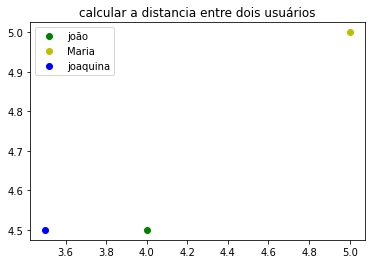

In [24]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go" )
plt.plot(5,5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["joão", "Maria", "joaquina"])
plt.title("calcular a distancia entre dois usuários")

In [27]:
joaquina = np.array([3.5, 4.5])
print (pitagoras(joao, maria))
print (pitagoras(joao, joaquina))

1.118033988749895
0.5


In [83]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)

In [30]:
print (distancia(joao, maria))
print (distancia(joao, joaquina))

1.118033988749895
0.5


In [69]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["FilmId", "Nota"]].set_index("FilmId")
  return notas_do_usuario


notas_do_usuario.loc[50]
localização do indice

In [76]:
usuario4 = notas_do_usuario(4)
usuario1 = notas_do_usuario(1) 

In [77]:
usuario1.head()

,Nota
FilmId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [130]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas["Nota_esquerda"], diferencas["Nota_direita"])


11.135528725660043

In [128]:
usuario1.join(usuario4, lsuffix="_usuario1", rsuffix="_usuario2").dropna()

,Nota_usuario1,Nota_usuario2
FilmId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [131]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_usuario1", rsuffix="_usuario2").dropna()
    distancia = distancia_de_vetores(diferencas["Nota_usuario1"], diferencas["Nota_usuario2"])
    return [usuario_id1, usuario_id2, distancia]

In [132]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [133]:
len(notas["usuarioId"].unique())

610

In [136]:

def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancias[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [148]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,voce,outra pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


usuarios sem filmes em comum são colocados bem distante um do outro

In [147]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_usuario1", rsuffix="_usuario2").dropna()
    
    if(len(diferencas) < minimo):
      return [usuario_id1, usuario_id2, 100000]
    
    distancia = distancia_de_vetores(diferencas["Nota_usuario1"], diferencas["Nota_usuario2"])
    return [usuario_id1, usuario_id2, distancia]

In [157]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra pessoa").drop(voce_id)
  return distancias

In [159]:
mais_proximos_de(1).head(10)

,voce,distancia
outra pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
9,1,1.000000
258,1,1.000000
319,1,1.118034
398,1,1.224745
